In [1]:
proj_path='/content/drive/MyDrive/S4 - 16824 VLR/generative-modeling/gan'

### Git Stuff

### Colab stuff

In [4]:
# one-time data set-up
# #!pip show "clean-fid"
# !cd "$proj_path/$hw_dir" && source "setup_data.sh"
# !ls "/usr/local/lib/python3.7/dist-packages/cleanfid"
# !mkdir "/usr/local/lib/python3.7/dist-packages/cleanfid/stats"
# !cd "$proj_path/$hw_dir/$tasks" && cp cub_clean_custom_na.npz "/usr/local/lib/python3.7/dist-packages/cleanfid/stats/cub_clean_custom_na.npz"

## Notebook

In [6]:
import sys, pathlib
sys.path.append('./gan')
sys.path.append('./vae')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### GAN

In [ ]:
from gan.networks import *
from gan.train import *
from gan.q1_5 import compute_discriminator_loss, compute_generator_loss
from networks import Discriminator, Generator

In [ ]:
gen = Generator().cuda().to(memory_format=torch.channels_last)
disc = Discriminator().cuda().to(memory_format=torch.channels_last)
#prefix = "data_gan/"
prefix = "data_wgan_gp/"
os.makedirs(prefix, exist_ok=True)
# TODO 1.3.2: Run this line of code.
train_model(
    gen,
    disc,
    num_iterations=int(3e4),
    batch_size=16,
    prefix=prefix,
    gen_loss_fn=compute_generator_loss,
    disc_loss_fn=compute_discriminator_loss,
    log_period=1000,
    wandb_logging=True
)

Epoch after iters:5159
Epoch after iters:5896
compute FID of a model with cub-32 statistics


<<<<<<< local <removed>
FID model: 100%|████████████████████████████████████████| 625/625 [05:29<00:00,  1.90it/s]
>>>>>>> remote <modified: >


Iteration 6000 FID: 311.67309753217546
Epoch after iters:6633
compute FID of a model with cub-32 statistics


<<<<<<< local <removed>
FID model: 100%|████████████████████████████████████████| 625/625 [04:37<00:00,  2.25it/s]
>>>>>>> remote <modified: >


Iteration 7000 FID: 306.9590930977215
Epoch after iters:7370
compute FID of a model with cub-32 statistics


<<<<<<< local <removed>
FID model: 100%|████████████████████████████████████████| 625/625 [07:08<00:00,  1.46it/s]
>>>>>>> remote <modified: >


Iteration 8000 FID: 297.3417091453295
Epoch after iters:8107
Epoch after iters:8844
compute FID of a model with cub-32 statistics


<<<<<<< local <removed>
FID model: 100%|████████████████████████████████████████| 625/625 [04:58<00:00,  2.09it/s]
>>>>>>> remote <modified: >


Iteration 9000 FID: 290.77342696024664
Epoch after iters:9581
compute FID of a model with cub-32 statistics


<<<<<<< local <removed>
FID model: 100%|████████████████████████████████████████| 625/625 [04:37<00:00,  2.25it/s]
>>>>>>> remote <modified: >
<<<<<<< local <removed>


Iteration 10000 FID: 300.0168350554314
Epoch after iters:10318


>>>>>>> remote <modified: >


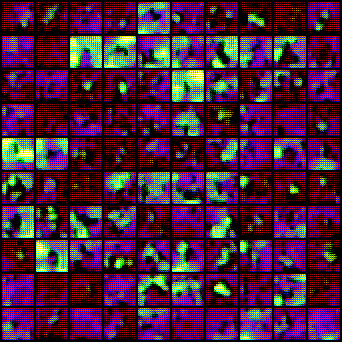

In [7]:
Image.open("data_ls_gan/"+"samples_{}.png".format(1000))

### VAE

In [ ]:
from vae.model import AEModel, VAEEncoder
from vae.train import vae_loss
#from vae.utils import compute_discriminator_loss, compute_generator_loss
#from networks import Discriminator, Generator

In [ ]:
x = torch.randn((2,)+input_shape)
model = AEModel(variational=True, latent_size=128, input_shape = (3, 32, 32))
mu, logvar = model.encoder(x)
print(mu.size(), logvar.size())
print(model.decoder(torch.randn(2, 128)).size())
print(vae_loss(model, x))